## OR-tools example

In [1]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
import numpy as np

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


### Initialize Moray East

In [2]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
border = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
# 'obstacles' is an optional location attribute
obstacles = [
    # - obstacles must be strictly inside the border polygon
    # - undefined behavior if obstacles and border overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]
substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

In [3]:
cables = [(3, 206), (5, 287), (7, 406)]

In [10]:
wfn = WindFarmNetwork(turbines=turbines, substations=substations, cables=cables, border=border, obstacles=obstacles)

<Axes: >

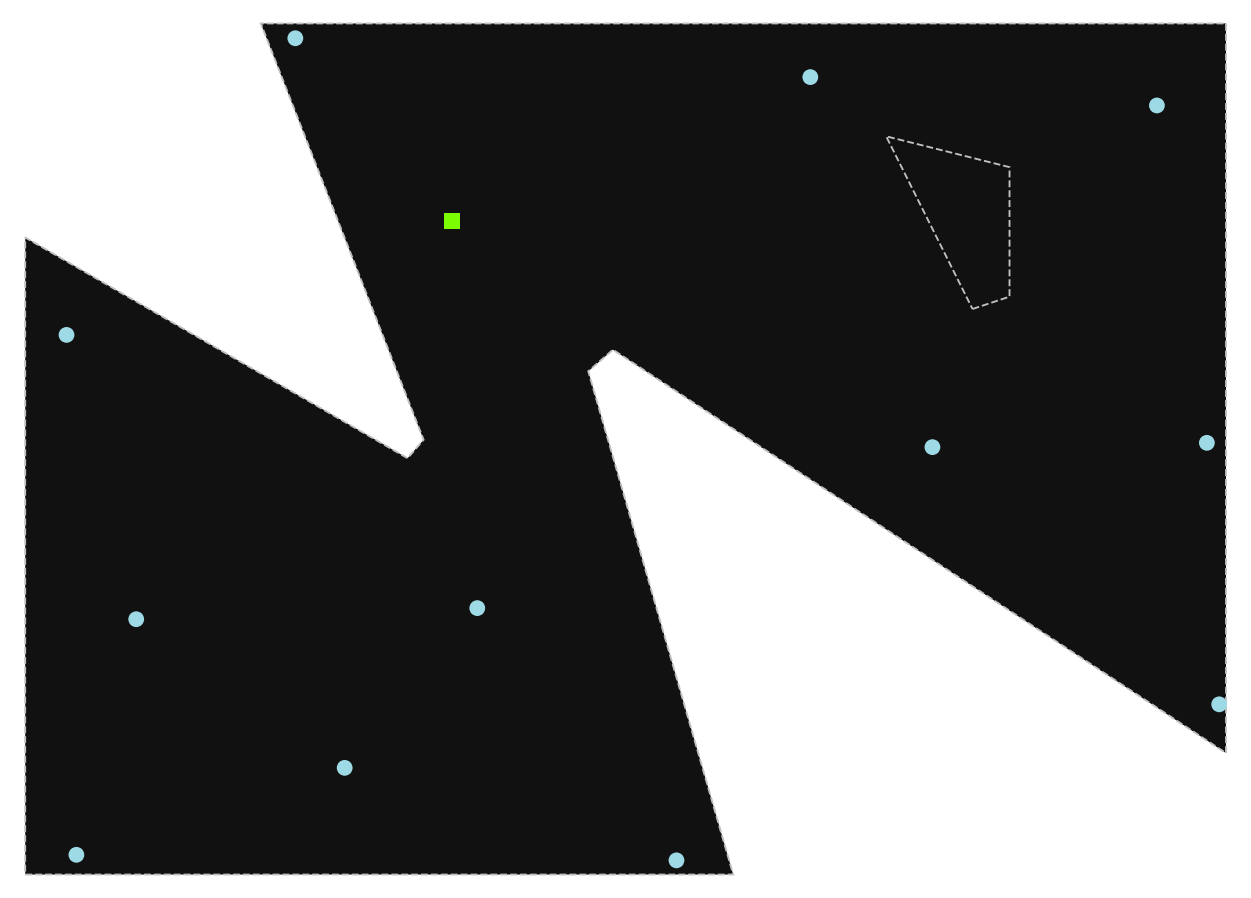

In [5]:
wfn.plot_L()

<Axes: >

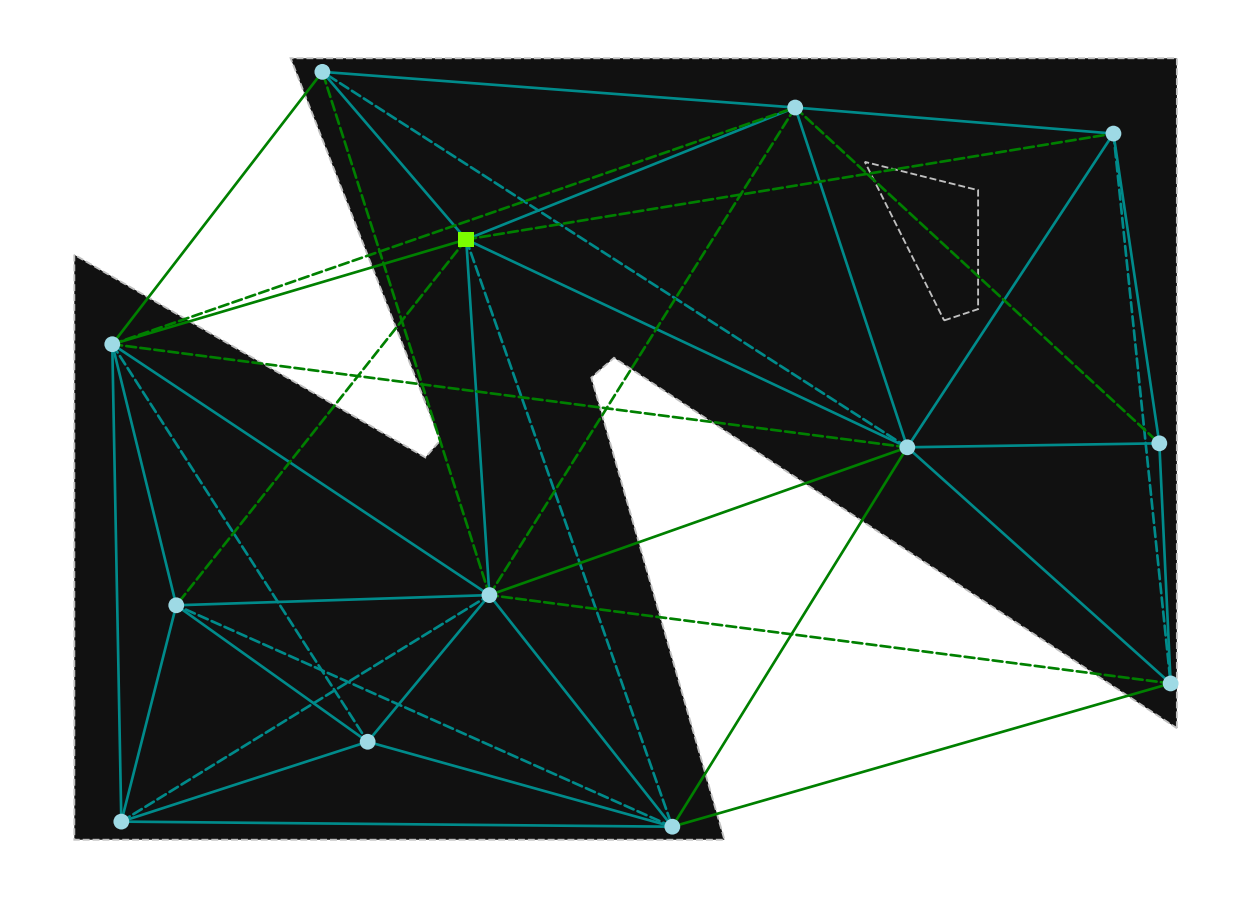

In [6]:
wfn.plot_A()

### Optimize Moray East

Initial heuristic solution to warm-start the solver:

<Axes: >

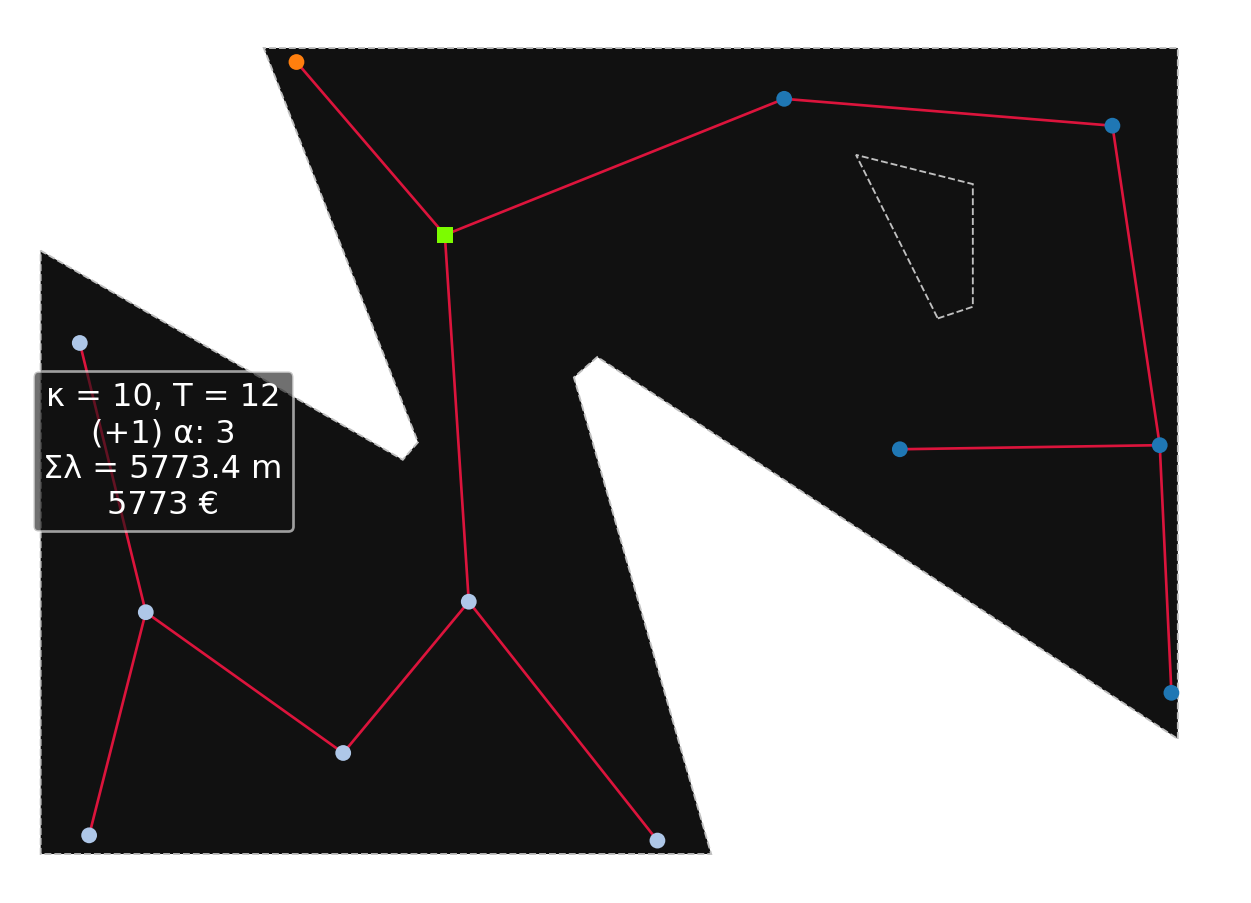

In [7]:
router_pre_solver = Heuristic(solver='Esau_Williams') #
res_pre_solver= wfn.optimize() # default is Heuristic Esau_Williams
wfn.plot()

In [8]:
solver_options=dict(
    max_time_in_seconds = 40,
    relative_gap_limit = 0.005,
    num_workers = 8,

# be verbose
log_search_progress = True,
# required to get the log inside the notebook (goes only to console otherwise)
log_callback = print,
)


model_options = {"gateXing_constraint": False,
                 "branching": True,
                 "gates_limit": False}

router = MILP(solver='ortools', solver_options=solver_options, model_options=model_options, detour=True)
res = wfn.optimize(router=router)


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model '': (model_fingerprint: 0xbe1262b1343d2931)
#Variables: 160 (#bools: 46 in floating point objective)
  - 114 Booleans in [0,1]
  - 34 in [-9,9]
  - 12 in [0,10]
#kAtMostOne: 25 (#literals: 107)
#kLinear1: 228 (#enforced: 228)
#kLinearN: 15 (#terms: 150)

Starting presolve at 0.00s
[Scaling] Floating point objective has 46 terms with magnitude in [336.61, 1997.76] average = 883.25
[Scaling] Objective coefficient relative error: 2.15367e-08
[Scaling] Objective worst-case absolute error: 9.71978e-05
[Scaling] Objective scaling factor: 65536
  1.07e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.88e-03s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  3.62e-05s  0.00e+00d  [operations_research::sat::CpModelPresolver::ExtractEncodingFromLinear] #potential_su

<Axes: >

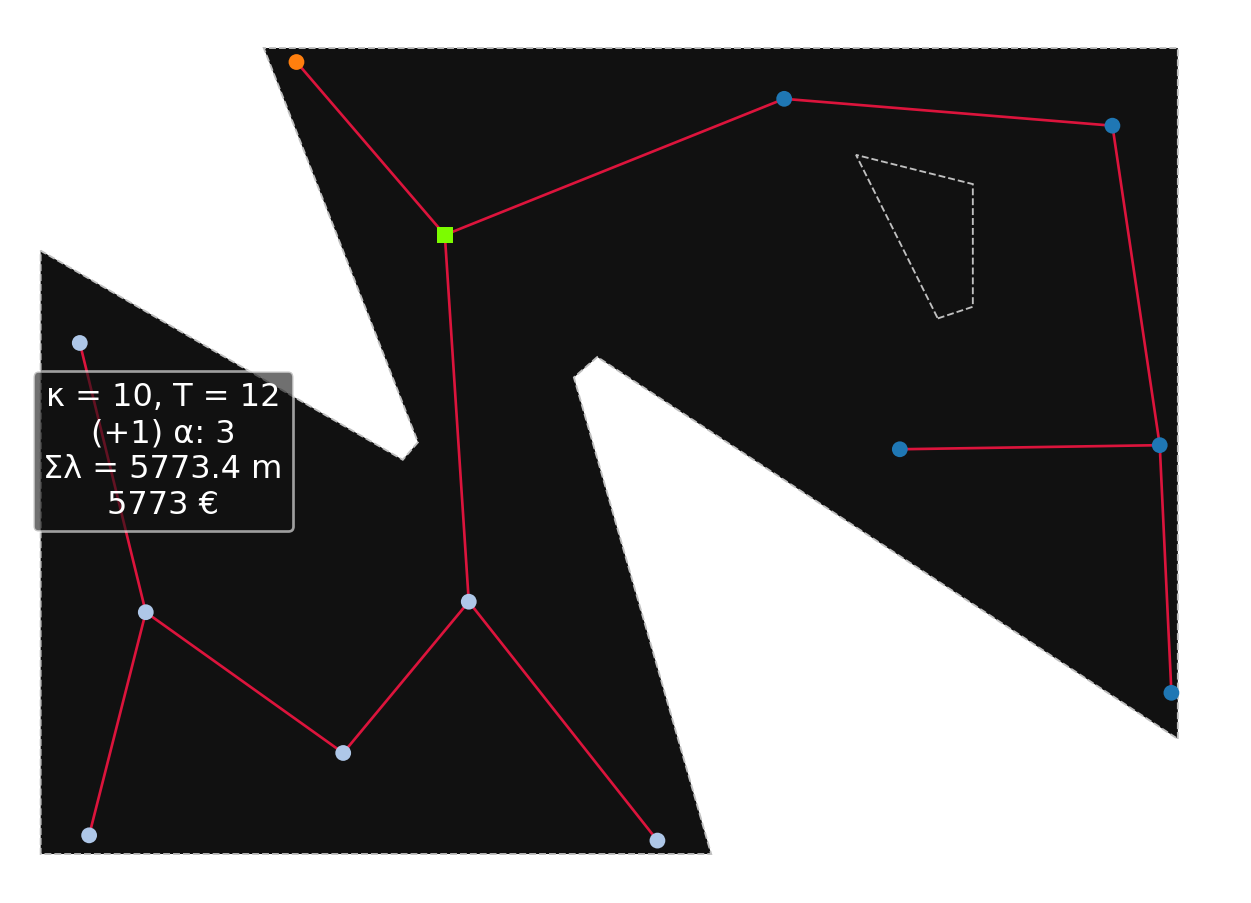

In [9]:
wfn.plot()